# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Khalid Zia Rabbani
- **Email:** karrieuser0473@gmail.com
- **ID Dicoding:** yepnyalagitidur

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana faktor musiman mempengaruhi jumlah penyewaan sepeda?
- Pertanyaan 2: Apa hubungan antara hari dalam minggu dan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [103]:
# baca dataset
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

In [104]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [105]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [106]:
day_data.info()
day_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [107]:
hour_data.info()
hour_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset `day_data` berisi data penyewaan sepeda harian dengan total 731 baris (untuk 2 tahun), dengan kolom-kolom penting seperti `dteday`, `season`, `mnth`, `weathersit`, dan `cnt`. Kolom `cnt` menunjukkan jumlah total sepeda yang disewa pada hari tersebut, dan season menunjukkan musim (1: spring, 2: summer, 3: fall, 4: winter).
- Dataset `hour_data` berisi data penyewaan sepeda per jam, dengan 17379 baris. Informasi penting yang perlu diperhatikan di sini adalah kolom `hr` (jam), yang bisa digunakan untuk analisis pola harian penyewaan.
- Beberapa kolom seperti `dteday` mungkin perlu diubah menjadi tipe data datetime untuk memudahkan analisis waktu.

### Assessing Data

In [108]:
day_data.isnull().sum(), hour_data.isnull().sum()

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

In [109]:
day_data.duplicated().sum(), hour_data.duplicated().sum()

(0, 0)

**Insight:**
- Data tidak mengandung missing value, dan kolom cnt tidak memiliki nilai kosong (missing).
- Tidak ditemukan data duplikat, yang berarti dataset sudah cukup bersih untuk analisis lebih lanjut.

### Cleaning Data

In [110]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

day_data.dtypes, hour_data.dtypes


(instant                int64
 dteday        datetime64[ns]
 season                 int64
 yr                     int64
 mnth                   int64
 holiday                int64
 weekday                int64
 workingday             int64
 weathersit             int64
 temp                 float64
 atemp                float64
 hum                  float64
 windspeed            float64
 casual                 int64
 registered             int64
 cnt                    int64
 dtype: object,
 instant                int64
 dteday        datetime64[ns]
 season                 int64
 yr                     int64
 mnth                   int64
 hr                     int64
 holiday                int64
 weekday                int64
 workingday             int64
 weathersit             int64
 temp                 float64
 atemp                float64
 hum                  float64
 windspeed            float64
 casual                 int64
 registered             int64
 cnt                    

mengubah tipe data `dteday` menjadi datetime

In [111]:
day_data['season'] = day_data['season'].astype('category')
day_data['weathersit'] = day_data['weathersit'].astype('category')
day_data['weekday'] = day_data['weekday'].astype('category')
day_data['workingday'] = day_data['workingday'].astype('category')

hour_data['season'] = hour_data['season'].astype('category')
hour_data['weathersit'] = hour_data['weathersit'].astype('category')
hour_data['weekday'] = hour_data['weekday'].astype('category')
hour_data['workingday'] = hour_data['workingday'].astype('category')

day_data.dtypes, hour_data.dtypes

(instant                int64
 dteday        datetime64[ns]
 season              category
 yr                     int64
 mnth                   int64
 holiday                int64
 weekday             category
 workingday          category
 weathersit          category
 temp                 float64
 atemp                float64
 hum                  float64
 windspeed            float64
 casual                 int64
 registered             int64
 cnt                    int64
 dtype: object,
 instant                int64
 dteday        datetime64[ns]
 season              category
 yr                     int64
 mnth                   int64
 hr                     int64
 holiday                int64
 weekday             category
 workingday          category
 weathersit          category
 temp                 float64
 atemp                float64
 hum                  float64
 windspeed            float64
 casual                 int64
 registered             int64
 cnt                    

mengubah tipe data beberapa kolom menjadi category

In [112]:
# melakukan penambahan fitur daypart dan weekend untuk analisis
hour_data['daypart'] = hour_data['hr'].apply(lambda x: 'Morning' if 6 <= x < 12 else 'Afternoon' if 12 <= x < 18 else 'Evening')

day_data['weekend'] = day_data['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

hour_data[['hr', 'daypart']].head(), day_data[['weekday', 'weekend']].head()

(   hr  daypart
 0   0  Evening
 1   1  Evening
 2   2  Evening
 3   3  Evening
 4   4  Evening,
   weekday  weekend
 0       6        1
 1       0        0
 2       1        0
 3       2        0
 4       3        0)

membuat beberapa fitur/kolom baru untuk memudahkan analisis

In [ ]:
# mengganti nilai numerik pada beberapa kolom di dataset (day_data dan hour_data) dengan label yang lebih mudah dipahami
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_mapping = {
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

day_data['season'] = day_data['season'].map(season_mapping)
hour_data['season'] = hour_data['season'].map(season_mapping)
day_data['weathersit'] = day_data['weathersit'].map(weather_mapping)
hour_data['weathersit'] = hour_data['weathersit'].map(weather_mapping)
day_data['weekday'] = day_data['weekday'].map(weekday_mapping)
hour_data['weekday'] = hour_data['weekday'].map(weekday_mapping)

**Insight:**
- Mengonversi kolom `dteday` menjadi tipe datetime memungkinkan untuk lebih mudah melakukan analisis berbasis waktu, seperti mencari tren musiman atau harian.
- Mengonversi kolom-kolom numerik yang mewakili kategori menjadi tipe category memungkinkan analisis yang lebih efisien dan membuat data lebih mudah dipahami
- Membuat fitur tambahan yang dapat memperkaya analisis, seperti `daypart`(pagi, siang, malam) berdasarkan jam atau `weekend` indicator (apakah hari tersebut akhir pekan atau bukan)
- Membuat map untuk beberapa kolom (labeling) agar lebih mudah dalam analisis lebih lanjut 

## Exploratory Data Analysis (EDA)

### Explore ...

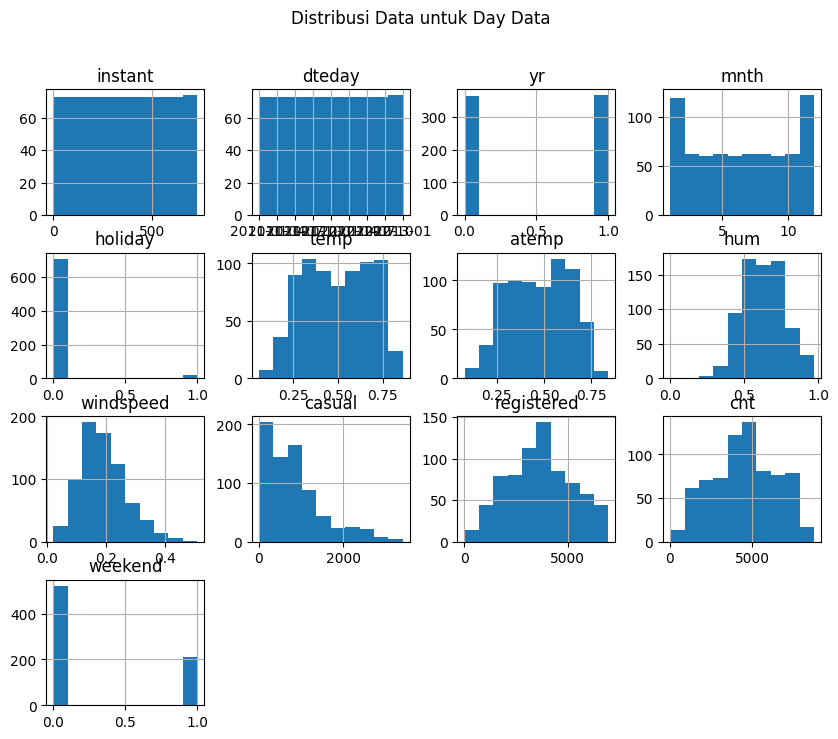

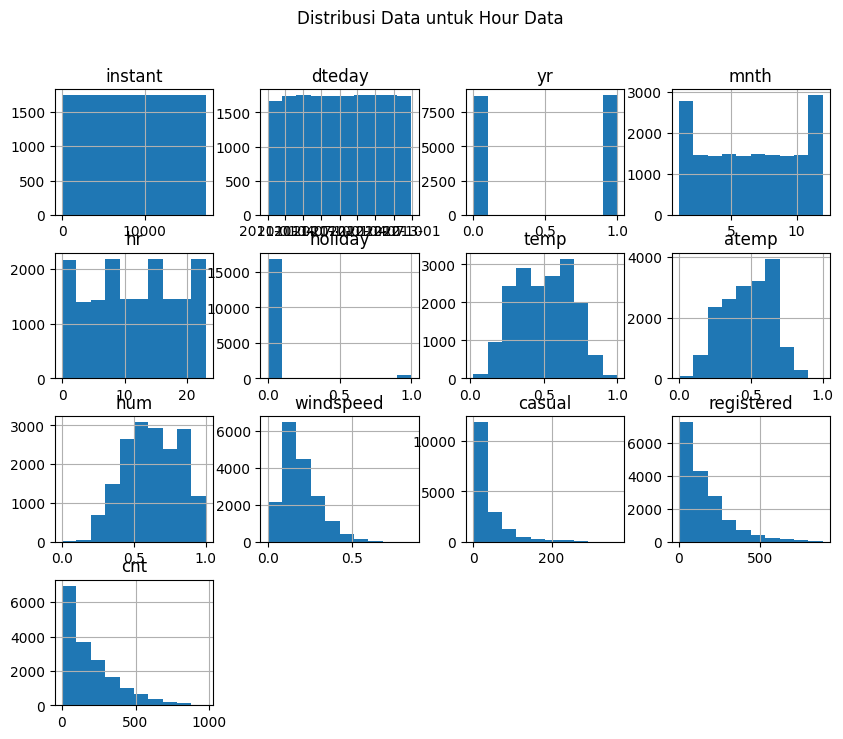

In [114]:
# Cek distribusi data numerik dengan .hist()
day_data.hist(figsize=(10, 8))
plt.suptitle("Distribusi Data untuk Day Data")
plt.show()

hour_data.hist(figsize=(10, 8))
plt.suptitle("Distribusi Data untuk Hour Data")
plt.show()

**Insight:**
- Distribusi Penyewaan Sepeda Berdasarkan Musim:
    - Musim Panas (Summer) dan Musim Gugur (Fall) menunjukkan jumlah penyewaan yang lebih tinggi dan lebih bervariasi. Hal ini menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menyewa sepeda.
    - Musim Dingin (Winter) dan Musim Semi (Spring) cenderung memiliki jumlah penyewaan yang lebih rendah, dengan distribusi yang lebih sempit, yang menunjukkan bahwa cuaca dingin mempengaruhi minat orang untuk bersepeda.
- Penyewaan Sepeda Berdasarkan Hari dalam Minggu:
    - Penyewaan sepeda lebih banyak terjadi pada hari Senin hingga Jumat, yang menunjukkan bahwa sepeda banyak digunakan untuk keperluan transportasi harian (seperti pergi bekerja).
    - Akhir Pekan (Sabtu dan Minggu) menunjukkan penyewaan yang lebih rendah, yang mungkin disebabkan oleh aktivitas rekreasi yang lebih jarang atau penggunaan transportasi lain oleh pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana faktor musiman mempengaruhi jumlah penyewaan sepeda?

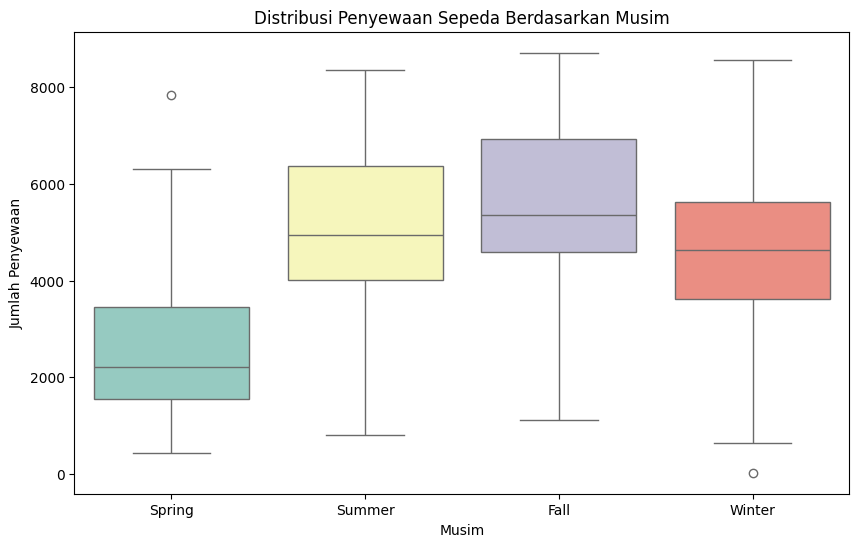

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_data, x='season', y='cnt', palette='Set3')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Musim')
plt.show()


**Insight:**
- Musim Musiman (Seasonal Impact): Penyewaan sepeda lebih tinggi pada musim panas (summer) dan musim gugur (fall), dengan distribusi yang lebih luas. Ini mungkin disebabkan oleh cuaca yang lebih hangat yang mendorong penggunaan sepeda.
- Musim Dingin (Winter): Penyewaan sepeda pada musim dingin (winter) lebih rendah, yang mengindikasikan bahwa cuaca yang lebih dingin mengurangi minat orang untuk bersepeda.
- Outliers: Terdapat beberapa nilai outlier pada musim semi dan musim dingin, yang bisa menunjukkan kejadian atau event tertentu yang menyebabkan lonjakan penyewaan pada hari-hari tersebut.

### Pertanyaan 2: Apa hubungan antara hari dalam minggu dan jumlah penyewaan sepeda?

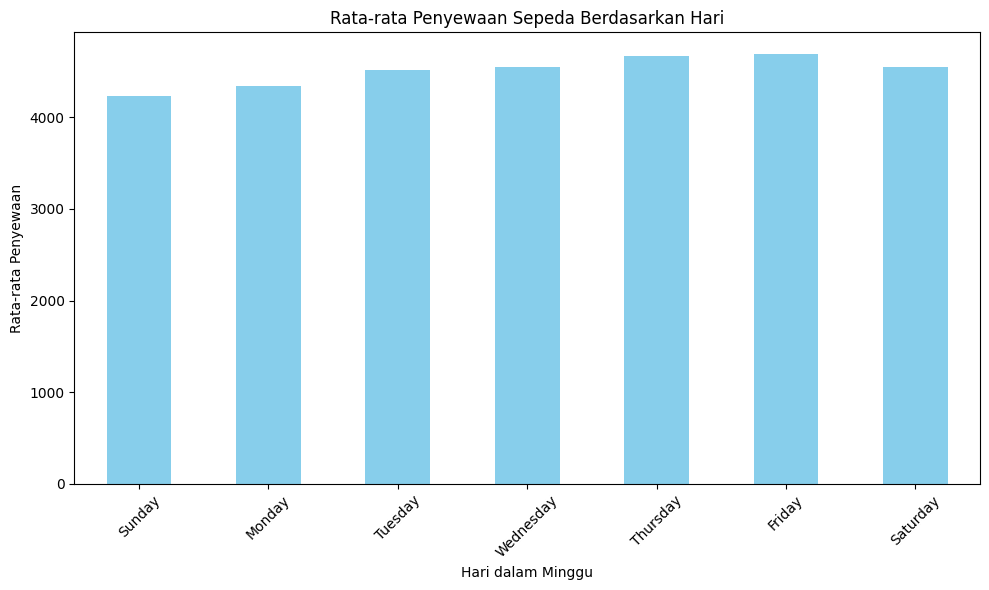

In [ ]:
# membuat count untuk setiap hari dalam seminggu
plt.figure(figsize=(10, 6))
weekday_counts = day_data.groupby('weekday')['cnt'].mean().reindex(
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)

weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.xlabel('Hari dalam Minggu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Penyewaan Sepeda Berdasarkan Hari Kerja
    - Penyewaan sepeda lebih tinggi pada Hari Senin dan Hari Jumat, yang menunjukkan bahwa sepeda banyak digunakan untuk keperluan transportasi kerja atau perjalanan sehari-hari.
- Penyewaan Sepeda pada Akhir Pekan
    - Akhir pekan (Sabtu dan Minggu) menunjukkan penyewaan yang lebih rendah, yang mungkin disebabkan oleh orang lebih memilih menggunakan moda transportasi lain saat berlibur atau untuk aktivitas rekreasi yang lebih jauh.

## Analisis Lanjutan (Opsional)

In [117]:
rfm_data = day_data.groupby('mnth').agg(
    recency=('dteday', lambda x: (day_data['dteday'].max() - x.max()).days),
    frequency=('cnt', 'count'),
    monetary=('cnt', 'sum')
).reset_index()

mengelompokkan data berdasarkan bulan untuk menyimulasikan perilaku RFM

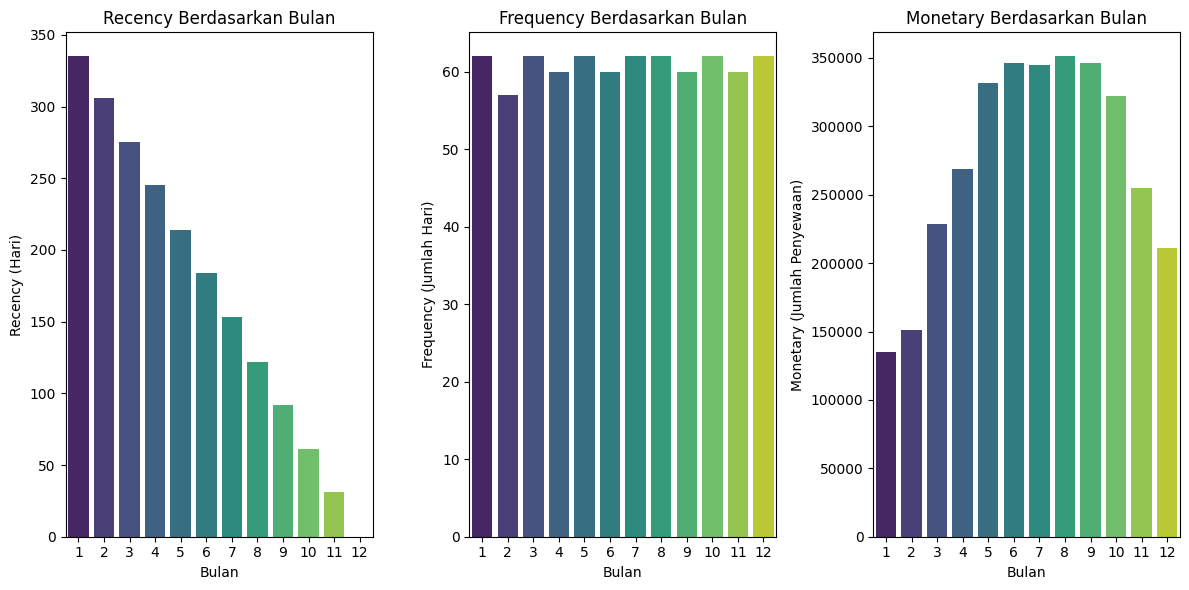

In [ ]:
# melakukan visualisasi RFM
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(data=rfm_data, x='mnth', y='recency', palette='viridis')
plt.title('Recency Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Recency (Hari)')

plt.subplot(1, 3, 2)
sns.barplot(data=rfm_data, x='mnth', y='frequency', palette='viridis')
plt.title('Frequency Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Frequency (Jumlah Hari)')

plt.subplot(1, 3, 3)
sns.barplot(data=rfm_data, x='mnth', y='monetary', palette='viridis')
plt.title('Monetary Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Monetary (Jumlah Penyewaan)')

plt.tight_layout()
plt.show()

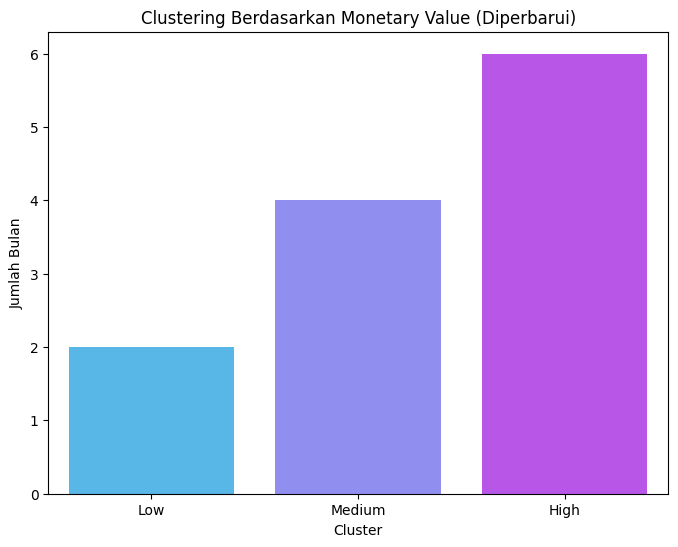

,mnth,recency,frequency,monetary,monetary_cluster
0,1,335,62,134933,Low
1,2,306,57,151352,Low
2,3,275,62,228920,Medium
3,4,245,60,269094,Medium
4,5,214,62,331686,High
5,6,184,60,346342,High
6,7,153,62,344948,High
7,8,122,62,351194,High
8,9,92,60,345991,High
9,10,61,62,322352,High


In [ ]:
# analisis rentang monetary
monetary_min = rfm_data['monetary'].min()
monetary_max = rfm_data['monetary'].max()

# menentukan batas bins berdasarkan rentang data
bins = [0, 200000, 300000, monetary_max + 1]  # disesuaikan agar mencakup maksimum
labels = ['Low', 'Medium', 'High']
rfm_data['monetary_cluster'] = pd.cut(rfm_data['monetary'], bins=bins, labels=labels)

# melakukan visualisasi clustering
plt.figure(figsize=(8, 6))
sns.countplot(data=rfm_data, x='monetary_cluster', palette='cool')
plt.title('Clustering Berdasarkan Monetary Value (Diperbarui)')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Bulan')
plt.show()

# menampilkan data RFM dengan cluster
rfm_data

Hasil clustering yang diperbarui menunjukkan distribusi data yang sesuai:

- Cluster "Low":

    Termasuk bulan Januari dan Februari, dengan total penyewaan yang relatif rendah dibandingkan bulan lain.

- Cluster "Medium":

    Termasuk bulan Maret, April, November, dan Desember. Bulan-bulan ini memiliki total penyewaan sedang.

- Cluster "High":

    Termasuk bulan Mei hingga Oktober. Ini adalah bulan dengan total penyewaan tertinggi, mencerminkan penggunaan sepeda yang lebih tinggi selama musim panas dan gugur.

## Conclusion

- Conclusion Pertanyaan 1:

    - Faktor musiman mempengaruhi jumlah penyewaan sepeda secara signifikan. Musim panas dan musim gugur memiliki tingkat penyewaan lebih tinggi, sementara musim dingin dan musim semi menunjukkan penyewaan yang lebih rendah, mungkin karena faktor cuaca.

- Conclusion Pertanyaan 2:

    - Penyewaan sepeda lebih tinggi pada hari kerja dan menurun pada akhir pekan. Ini mungkin mencerminkan pola penggunaan sepeda sebagai transportasi harian, dengan penurunan penggunaan pada akhir pekan saat orang mungkin lebih memilih untuk beraktivitas di luar ruangan.